# Analyse des Ventes Annuelles d’un Magasin (2019)

## Découverte des données

In [275]:
# importer les package

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [40]:
# collecter les noms de fichiers( datasets)
files = [file for file in os.listdir(r"C:\Users\Brenda\OneDrive\Desktop\New folder - Copy\PROJECTS\Analyse des ventes")]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [42]:
path= r"C:\Users\Brenda\OneDrive\Desktop\New folder - Copy\PROJECTS\Analyse des ventes"
# Créer une base de données vide
donnees_annee= pd.DataFrame()

for file in files:
    #donnees_mois=pd.read_csv(path+"\"+file)
    donnees_mois=pd.read_csv(os.path.join(path, file))
    donnees_annee=pd.concat([donnees_annee, donnees_mois])  
donnees_annee   


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [44]:
# Enregistrer le fichier join, donnees_annee, de tous les fichiers mois
donnees_annee.to_csv(path+"\donnees_annee.csv", index=False)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Brenda\AppData\Local\Temp\ipykernel_6304\277081297.py:1: SyntaxWarning: invalid escape sequence '\d'
  donnees_annee.to_csv(path+"\donnees_annee.csv", index=False)


In [46]:
donnees_annee.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [50]:
donnees_annee.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [54]:
# Supprimer les values manquantes
donnees_annee= donnees_annee.dropna(how="all")
donnees_annee.shape

(186305, 6)

## Question d'affaire 1 : En quel mois avons nous réalisé le meilleur chiffre d'affaire

In [59]:
def month(x):
    return x.split('/')[0]    

In [65]:
donnees_annee['Month']=donnees_annee['Order Date'].apply(month)
donnees_annee.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [174]:
donnees_annee.nunique()

Order ID            178437
Product                 19
Quantity Ordered         9
Price Each              17
Order Date          142395
Purchase Address    140787
Month                   12
Sales                   54
City                     9
Hour                    24
dtype: int64

In [71]:
donnees_annee['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [89]:
donnees_annee=donnees_annee[donnees_annee['Month'] !='Order Date']
donnees_annee['Month'].unique()

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10], dtype=int64)

In [85]:
donnees_annee['Month']= donnees_annee['Month'].astype(np.int64)
donnees_annee.dtypes

C:\Users\Brenda\AppData\Local\Temp\ipykernel_6304\2148410234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_annee['Month']= donnees_annee['Month'].astype(np.int64)


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [93]:
donnees_annee['Price Each']= donnees_annee['Price Each'].astype(float)
donnees_annee['Quantity Ordered']= donnees_annee['Quantity Ordered'].astype(np.int64)
donnees_annee['Order Date'] = pd.to_datetime(donnees_annee['Order Date'], errors='coerce')
donnees_annee.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
dtype: object

In [95]:
donnees_annee

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


### Calcule des ventes

In [98]:
donnees_annee['Sales']= donnees_annee['Quantity Ordered']*donnees_annee['Price Each']
donnees_annee

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99


In [104]:
donnees_annee.groupby('Month').sum('Sales')

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [108]:
donnees_annee.groupby('Month')['Sales'].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

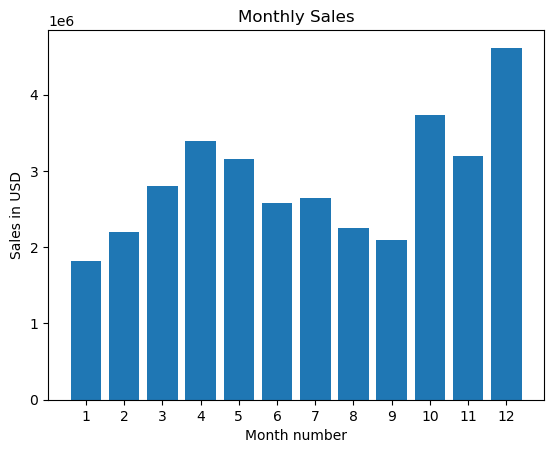

In [116]:
months =range(1, 13)
plt.bar(months, donnees_annee.groupby('Month')['Sales'].sum())
plt.xticks(months)
plt.xlabel('Month number')
plt.ylabel('Sales in USD')
plt.title('Monthly Sales')
plt.show


**Observation**

Le mois de décembre a enregistré le volume de ventes le plus élevé de l’année 2019, probablement en raison des fêtes de fin d'année, marquées par Noël, les promotions saisonnières et les achats de cadeaux.

Il est suivi par le mois d’octobre, qui présente également un niveau de ventes important, sans doute lié à des campagnes marketing automnales, à des lancements de produits, ou encore aux achats anticipés en vue des fêtes.

In [120]:
def City(x):
    return x.split(',')[1]

In [124]:
donnees_annee['City']= donnees_annee['Purchase Address'].apply(City)
donnees_annee

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [134]:
donnees_annee.groupby('City').sum('Sales')

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602,2779908.20,104794,2795498.58
Austin,11153,1809873.61,69829,1819581.75
Boston,22528,3637409.77,141112,3661642.01
Dallas,16730,2752627.82,104620,2767975.40
Los Angeles,33289,5421435.23,208325,5452570.80
New York City,27932,4635370.83,175741,4664317.43
Portland,14053,2307747.47,87765,2320490.61
San Francisco,50239,8211461.74,315520,8262203.91
Seattle,16553,2733296.01,104941,2747755.48


In [128]:
donnees_annee.groupby('City')['City'].count()

City
Atlanta          14881
Austin            9905
Boston           19934
Dallas           14820
Los Angeles      29605
New York City    24876
Portland         12465
San Francisco    44732
Seattle          14732
Name: City, dtype: int64

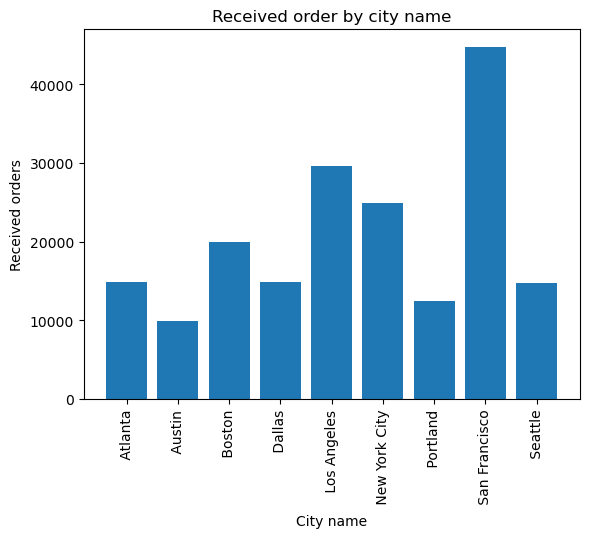

In [130]:
plt.bar(donnees_annee.groupby('City')['City'].count().index, donnees_annee.groupby('City')['City'].count())
plt.xticks(rotation='vertical')
plt.ylabel('Received orders')
plt.xlabel('City name')
plt.title('Received order by city name')
plt.show()

**Observation**

San Francisco arrive en tête avec un total de 50 239 unités commandées, ce qui en fait la ville la plus performante.

Elle est suivie par Los Angeles, avec 33 289 unités vendues, puis par New York City, qui enregistre 27 932 unités.

## Question d'affaire 2 : A quel moment doit on faire une campagne publicitaires pour avoir plus de ventes

In [146]:
donnees_annee['Hour']=donnees_annee['Order Date'].dt.hour

In [148]:
donnees_annee

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [150]:
keys=[]
hours=[]
for key, hour in donnees_annee.groupby('Hour'):
    keys.append(key)
    hours.append(len(hour))
hours    

[3910,
 2350,
 1243,
 831,
 854,
 1321,
 2482,
 4011,
 6256,
 8748,
 10944,
 12411,
 12587,
 12129,
 10984,
 10175,
 10384,
 10899,
 12280,
 12905,
 12228,
 10921,
 8822,
 6275]

Text(0, 0.5, 'Nombre de commandes')

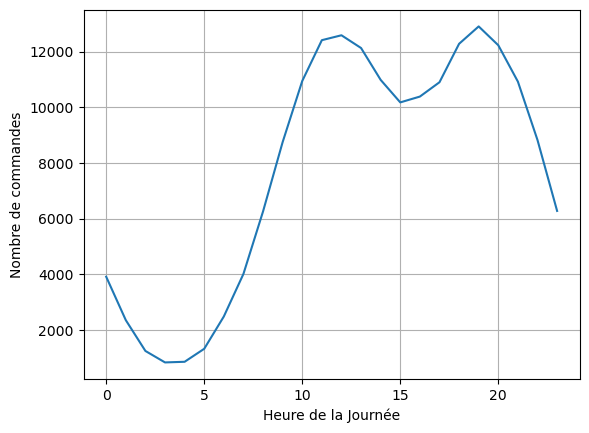

In [156]:
plt.grid()
plt.plot(keys, hours)
plt.xlabel('Heure de la Journée')
plt.ylabel('Nombre de commandes')

**Observations**

On observe également un pic de plus de 12 000 commandes à partir de 11h et à partir de 18h, correspondant probablement aux pauses déjeuner et aux fins de journée, moments propices aux achats en ligne.

À l’inverse, une baisse notable est enregistrée autour de 15h, avec moins de 10 500 commandes, ce qui pourrait refléter une période de moindre activité des consommateurs.

## Question d'affaire 3 : Quel produit se vend le plus?

<Axes: xlabel='Product'>

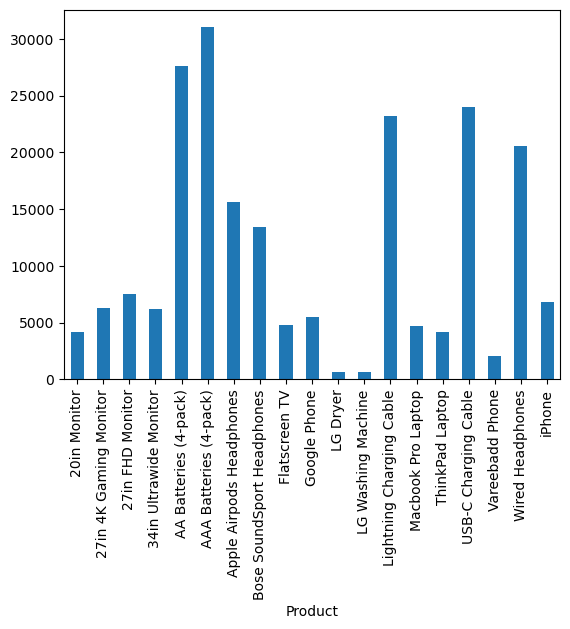

In [167]:
donnees_annee.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

**Observations**

Les batteries AA et AAA figurent parmi les produits les plus vendus au cours de l’année. 
Elles sont suivies par les câbles de recharge USB et les câbles de recharge Lightning, confirmant 
la forte demande pour les accessoires technologiques du quotidien.

In [189]:
donnees_annee.groupby('Product')['Price Each'].sum()

Product
20in Monitor                   451068.99
27in 4K Gaming Monitor        2429637.70
27in FHD Monitor              1125974.93
34in Ultrawide Monitor        2348718.19
AA Batteries (4-pack)           79015.68
AAA Batteries (4-pack)          61716.59
Apple Airpods Headphones      2332350.00
Bose SoundSport Headphones    1332366.75
Flatscreen TV                 1440000.00
Google Phone                  3315000.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       323787.10
Macbook Pro Laptop            8030800.00
ThinkPad Laptop               4127958.72
USB-C Charging Cable           261740.85
Vareebadd Phone                826000.00
Wired Headphones               226395.18
iPhone                        4789400.00
Name: Price Each, dtype: float64

In [179]:
donnees_annee.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [220]:
donnees_annee.groupby('Product')['Price Each'].agg(['mean', 'min', 'max', 'std', 'count'])


,mean,min,max,std,count
Product,,,,,
20in Monitor,109.99,109.99,109.99,0.0,4101
27in 4K Gaming Monitor,389.99,389.99,389.99,0.0,6230
27in FHD Monitor,149.99,149.99,149.99,0.0,7507
34in Ultrawide Monitor,379.99,379.99,379.99,0.0,6181
AA Batteries (4-pack),3.84,3.84,3.84,0.0,20577
AAA Batteries (4-pack),2.99,2.99,2.99,0.0,20641
Apple Airpods Headphones,150.00,150.00,150.00,0.0,15549
Bose SoundSport Headphones,99.99,99.99,99.99,0.0,13325
Flatscreen TV,300.00,300.00,300.00,0.0,4800


In [200]:
products=donnees_annee.groupby('Product')['Price Each'].sum().index
quantity=donnees_annee.groupby('Product')['Price Each'].sum()
prices=donnees_annee.groupby('Product')['Price Each'].mean()

C:\Users\Brenda\AppData\Local\Temp\ipykernel_6304\2545990793.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

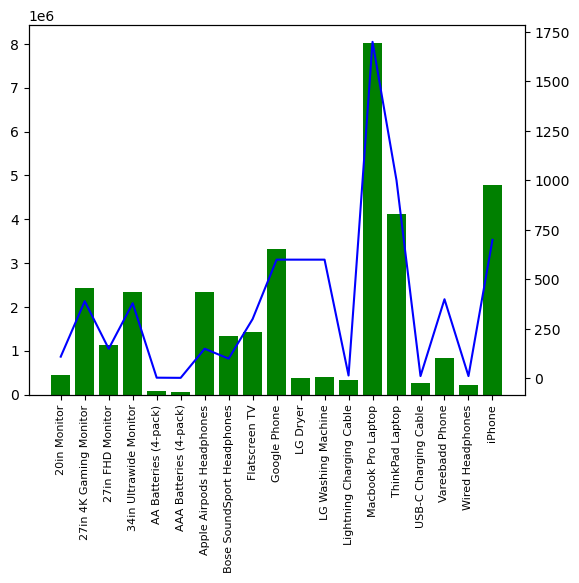

In [204]:
plt.figure(figsize=(40,24))
plt, ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity,color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

## Question d'affaire 4 : Quelles sont les combinaisons de produits qui se vendent le plus

In [224]:
from itertools import combinations
from collections import Counter

In [255]:
# Regrouper les produits par commande
donnees_annee['Grouped'] = donnees_annee.groupby('Order ID')['Product'].transform(
    lambda x: ', '.join(sorted(x))
)

# Supprimer les doublons de commandes
grouped_df = donnees_annee[['Order ID', 'Grouped']].drop_duplicates()

# Compter les combinaisons de 3 produits
combinaisons_count = Counter()

for group in grouped_df['Grouped']:
    produits = group.split(', ')
    if len(produits) >= 3:
        combinaisons_count.update(combinations(produits, 3))

# Afficher les 10 trios de produits les plus fréquents
print(" Les combinaisons de 3 produits les plus fréquemment vendues ensemble :")
print('')
for combo, count in combinaisons_count.most_common(10):
    print(f"{combo} → {count} ventes")
    print('')

 Les combinaisons de 3 produits les plus fréquemment vendues ensemble :

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') → 89 ventes

('Lightning Charging Cable', 'Wired Headphones', 'iPhone') → 63 ventes

('Apple Airpods Headphones', 'Lightning Charging Cable', 'iPhone') → 47 ventes

('Bose SoundSport Headphones', 'Google Phone', 'USB-C Charging Cable') → 35 ventes

('USB-C Charging Cable', 'Vareebadd Phone', 'Wired Headphones') → 33 ventes

('Apple Airpods Headphones', 'Wired Headphones', 'iPhone') → 27 ventes

('Bose SoundSport Headphones', 'Google Phone', 'Wired Headphones') → 24 ventes

('Bose SoundSport Headphones', 'USB-C Charging Cable', 'Vareebadd Phone') → 16 ventes

('Bose SoundSport Headphones', 'USB-C Charging Cable', 'Wired Headphones') → 5 ventes

('Bose SoundSport Headphones', 'Vareebadd Phone', 'Wired Headphones') → 5 ventes



In [256]:

# Compter les combinaisons de 2 produits
combinaisons_count = Counter()

for group in grouped_df['Grouped']:
    produits = group.split(', ')
    if len(produits) >= 2:
        combinaisons_count.update(combinations(produits, 2))

# Afficher les 10 trios de produits les plus fréquents
print(" Les combinaisons de 2 produits les plus fréquemment vendues ensemble :")
print('')
for combo, count in combinaisons_count.most_common(10):
    print(f"{combo} → {count} ventes")
    print('')

 Les combinaisons de 2 produits les plus fréquemment vendues ensemble :

('Lightning Charging Cable', 'iPhone') → 1015 ventes

('Google Phone', 'USB-C Charging Cable') → 999 ventes

('Wired Headphones', 'iPhone') → 462 ventes

('Google Phone', 'Wired Headphones') → 423 ventes

('Apple Airpods Headphones', 'iPhone') → 373 ventes

('USB-C Charging Cable', 'Vareebadd Phone') → 368 ventes

('Bose SoundSport Headphones', 'Google Phone') → 228 ventes

('USB-C Charging Cable', 'Wired Headphones') → 205 ventes

('Vareebadd Phone', 'Wired Headphones') → 149 ventes

('Lightning Charging Cable', 'Wired Headphones') → 129 ventes



In [259]:
# Extraire les 10 trios les plus fréquents
top_10 = combinaisons_count.most_common(10)

# Séparer en labels (nom des produits) et valeurs (nombre de ventes)
labels = ['\n'.join(combo) for combo, count in top_10]  # Pour afficher les 3 produits sur plusieurs lignes
values = [count for combo, count in top_10]


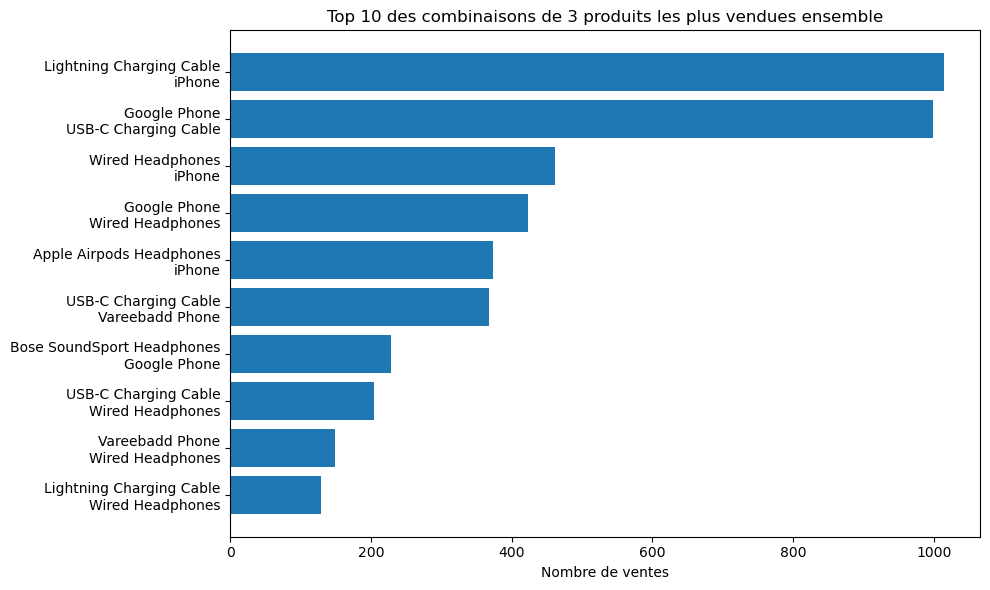

In [277]:
plt.figure(figsize=(10, 6))
plt.barh(labels, values)
plt.xlabel("Nombre de ventes")
plt.title("Top 10 des combinaisons de 3 produits les plus vendues ensemble")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()